## **Minimizing Cost and Deflection posed by Welding Beam**

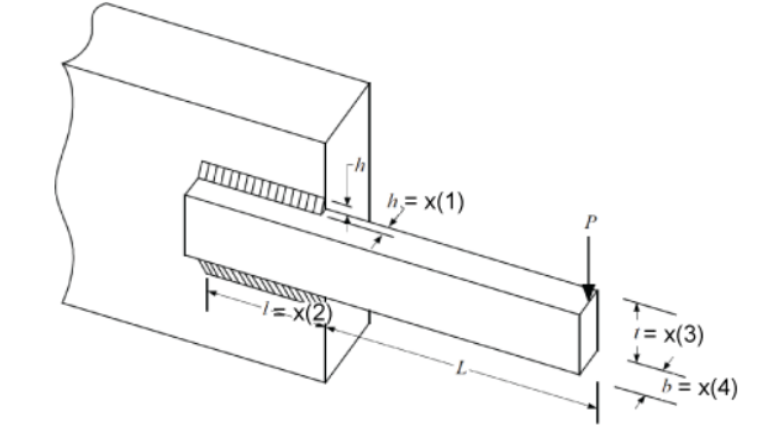

# **Cost and Deflection Functions:**

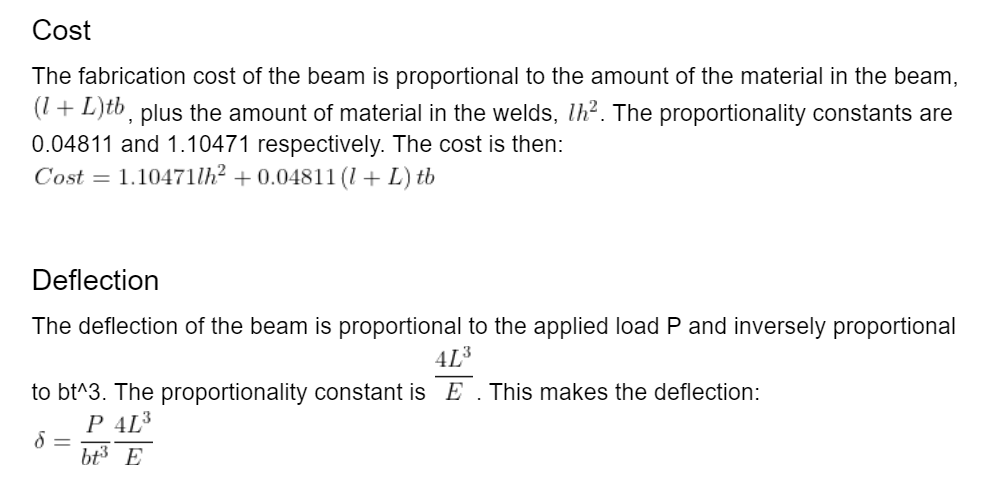

In [33]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from random import uniform as rd
import math
import warnings

In [14]:
#optimal solution [x]:
    #0 - h: thickness of weld
    #1 - l: length of the weld
    #2 - t: height of the beam
    #3 - b: width of the beam

#given constants
P = 6000 #load
L = 14 #distance

#Steel Properties (given)
E = 30 * 10**6 #psi
G = 12 * 10**6 #psi

#cost function
def cost(h, l, t, b): 
    return (1.10471 * l * h * h) + (0.04811*(l+L)*t*b) #to be minimized

#deflection function
def delta(t, b):
    return (P*4*(L**3))/(b*(t**3)*E) #to be minimized

#objective function (w - weight of weld in (0, 1.1, 0.1))
def obj_fun(x): #x[0], x[1], x[2], x[3] = h, l, t, b
    return w_curr * cost(x[0], x[1], x[2], x[3]) + ((1 - w_curr) * delta(x[2], x[3])) * 1000

#eq 1 required for shear stress
def R(h, l, t):
    return math.sqrt(l**2 + (h+t)**2)

#eq 2 required for shear stress
def tau_A(h, l):
    return 1/(h*l*math.sqrt(2))

#eq 3 required for shear stress
def tau_B(h, l, t): 
    return ((L + l/2)*R(h, l, t))/(((l**2/3) + (h+t)**2)*h*t*math.sqrt(2))

#shear stress
def tau(tau_A, tau_B, l, R):
    return P * math.sqrt((tau_A**2)+(tau_B**2) + (2*tau_A*tau_B*l)/R)

#bounds for h, l, t, b
bnds = ((0.125, 5), (0.1, 10), (0.1, 10), (0.125, 5))

#constraints for objective function
cons = ({'type': 'ineq', 'fun': lambda x: x[3]-x[0]}, #weld thickness constraint
        {'type': 'ineq', 'fun': lambda x: (30*10**3)-((6*P*L)/(x[3]*x[2]**2))}, #normal stress constraint
        {'type': 'ineq', 'fun': lambda x: ((4.013*E*x[2]*x[3]**3)/(6*L*L)*(1-((x[2]/(2*L))*(math.sqrt(E/(4*G))))))-P}, #critical buckling load constraint
        {'type': 'ineq', 'fun': lambda x: 13600-tau(tau_A(x[0], x[1]), tau_B(x[0], x[1], x[2]), x[1], R(x[0], x[1], x[2]))}) #shear stress constraint

In [39]:
warnings.filterwarnings('ignore') #used to ignore warnings by scipy library

w = np.arange(0, 1.1, 0.1) #creating array of possible w (weight of weld)

cost_vals = [] #array of most optimal cost values for a given w
def_vals = [] #array of most optimal deflection values for a given w

#looping through every value of w
for i in range(len(w)):
    w_curr = w[i] #varying values of w from 0 to 1 in intervals of 0.1
    fin_sol = [] #best solution in multi-start (minimum value of objective function produced)
    curr_obj_val = 0 #used to compare objective function values

    #multi-start from differing solutions to overcome local optimality (current number of starts: 100)
    for j in range(100):
        #creating random values for h, l, t, b
        a = rd(0.125, 5.0)
        b = rd(0.1, 10.0)
        c = rd(0.1, 10.0)
        d = rd(0.125, 5)

        #finding solution for given w and given h, l, t, b values
        sol = minimize(obj_fun, (a,b,c,d), method='SLSQP', bounds=bnds, constraints=cons)

        #for first run of algorithm, curr_obj_val is set to first obj_val found
        if(j == 1):
            curr_obj_val = obj_fun(sol.x)
            fin_sol = sol.x

        #for all further iterations not the first, curr_obj_val is compared to future obj_val s and lower one is kept
        elif(curr_obj_val >= obj_fun(sol.x)):
            curr_obj_val = obj_fun(sol.x)
            fin_sol = sol.x

        #if the current obj_val output is larger than curr_obj_val, it is not kept
        else:
            pass

    #appending to cost_def_vals respective cost and deflection values for optimal h, l, t, b
    cost_vals.append(cost(fin_sol[0], fin_sol[1], fin_sol[2], fin_sol[3]))
    def_vals.append(delta(fin_sol[2], fin_sol[3]))

    #print statements
    print("w value:", w_curr, "|", "h, l, t, b values:", [a,b,c,d])
    print("Cost:", cost_vals[i])
    print("Deflection:", def_vals[i]) 
    print("---------------------------")
    print()

w value: 0.0 | h, l, t, b values: [3.8662241967138606, 5.9994760157682725, 6.538599786054528, 1.5590670159853783]
Cost: 147.17725974203103
Deflection: 0.00043904
---------------------------

w value: 0.1 | h, l, t, b values: [2.6813266086014793, 9.513696934161393, 4.769316593017425, 4.191918941891801]
Cost: 11.982212296335954
Deflection: 0.001298214922511986
---------------------------

w value: 0.2 | h, l, t, b values: [4.9295469701630585, 7.836335462142569, 7.986874694118293, 0.7677341259477525]
Cost: 8.055634895614531
Deflection: 0.0019528283195512075
---------------------------

w value: 0.30000000000000004 | h, l, t, b values: [4.004832714045927, 1.3259803452009933, 9.327944013419835, 0.306500456102931]
Cost: 6.193355520729622
Deflection: 0.0025624908463034177
---------------------------

w value: 0.4 | h, l, t, b values: [1.8128636929779096, 1.2313205111074974, 4.98653784934902, 1.5521367423981236]
Cost: 4.996194312922486
Deflection: 0.00320247019119875
--------------------------

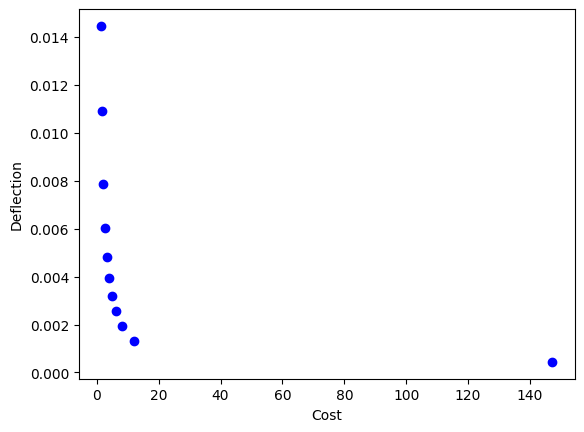

In [42]:
#using matplotlib to visuaize relationship between cost and deflection of optimal solutions for w between 0 and 1
plt.plot(cost_vals, def_vals, 'bo') #bo - blue circle

#naming axis
plt.xlabel('Cost')
plt.ylabel('Deflection')

#output graph
plt.show()